<a href="https://colab.research.google.com/github/radanim/TIL/blob/master/%EB%AC%B8%ED%97%8C%EC%A0%81%EC%9A%A9%EA%B0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def solution(n):
    answer=0
    
    for i in range(1,n+1):
        count=0
        
        for j in range(1,i+1):
        
            if i%j==0:
                count = count+1
        if count==2:
            answer=answer+1
    
    return answer

if __name__=='__main__':
    inputNum=3
    result=solution(inputNum)
    print("input Num:"+str(inputNum)+" Result:"+str(result))

input Num:3 Result:2


In [ ]:
이상탐지 논문
논문 리뷰 
outlier detection : 방법, 모델, 분류
서포트 벡터 끝과 끝 사이의 간격은 마진

SyntaxError: ignored

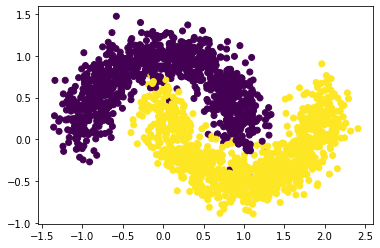

[0.89  0.89  0.89  0.89  0.89  0.845 0.855 0.875 0.895 0.855]
교차검증 평균 : 0.8775000000000001
[0.985  0.985  0.9875 0.985  0.9925]
교차검증 평균 : 0.9869999999999999


In [ ]:
import sklearn.datasets as d
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

#[s] 300개의 랜덤 데이터를 찍어보기
X,y = d.make_moons(n_samples = 2000, noise=0.16, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
#[E]

#[S]-선형
svm_clf=svm.SVC(kernel='linear', random_state=100) # 선형
scores=cross_val_score(svm_clf, X,y,cv=10)
print(scores)

pd.DataFrame(cross_validate(svm_clf, X,y,cv=10))
print("교차검증 평균 : "+str(scores.mean()))
#[E]

#[S]-비선형
svm_clf=svm.SVC(kernel='rbf') # 비선형
scores=cross_val_score(svm_clf, X, y, cv=5)
print(scores)

pd.DataFrame(cross_validate(svm_clf, X, y, cv=5))
print("교차검증 평균 : "+str(scores.mean()))
#[E]

In [ ]:
epoch: 학습횟수
batch size: 학습 단위
window size: 시계열 단위

SyntaxError: ignored

In [ ]:
이상치 방법론 Beat GAN
고립된 애들 이상치 Iforest 
OC-svm
원점 기준 벡터 
오토인코더 
인코더 암호화
디코더 복호화 

In [ ]:
discriminator 
generator random noise 

In [1]:
!pip install spartan2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import spartan as st


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
time, value=st.loadTensor(path = "/content/drive/MyDrive/ecg_timeseries_small.zip", col_types = [float, float],sep=' ').toDTensor(hastticks=True)
time_series=st.Timeseries(value, time)

In [12]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 8.9 MB/s 


In [14]:
rpeak = st.RPeak(time_series)
segments=rpeak.run()

In [15]:
segments.shape

(122, 1, 256)

In [16]:
beatgan_CNN=st.BeatGAN(segments, 'my_beatgan_model', network="CNN")

[Conv1d(1, 32, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(32, 64, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(64, 128, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(128, 256, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(256, 512, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(512, 1024, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), Ba

/usr/local/lib/python3.7/dist-packages/spartan/model/beatgan/preprocess.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  self.data = torch.Tensor(segments)


In [17]:
trained_model = beatgan_CNN.fit()

 20%|██        | 1/5 [00:03<00:14,  3.62s/it]

0:loss_g(rec/adv):0.3142813444137573/0.604019284248352,loss_d(real/fake):0.07241343706846237/1.7532498836517334


 40%|████      | 2/5 [00:06<00:10,  3.34s/it]

0:loss_g(rec/adv):0.26325079798698425/0.9774378538131714,loss_d(real/fake):19.935779571533203/0.0


 60%|██████    | 3/5 [00:09<00:06,  3.12s/it]

0:loss_g(rec/adv):0.16188938915729523/0.597143292427063,loss_d(real/fake):0.0/10.3968505859375


 80%|████████  | 4/5 [00:12<00:02,  2.99s/it]

0:loss_g(rec/adv):0.14157679677009583/0.7525346279144287,loss_d(real/fake):4.506710320129059e-05/7.515644073486328


100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

0:loss_g(rec/adv):0.15022923052310944/0.22904853522777557,loss_d(real/fake):7.983761310577393/8.475035429000854e-08


In [25]:
rpeak_params = {'sampling_rate':360, 'left_size':120,'right_size':136}
beatgan_params={'network':'CNN','seq_len':256,'stride':32,'input_size':1,'rep_size':20,'model_name':'my_beatgan_model'}
pipeline=st.PipeLine(time_series, [(st.RPeak,rpeak_params),((st.Train, st.TrainPolicy.BeatGAN), beatgan_params)])
pipeline.run()

[Conv1d(1, 32, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(32, 64, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(64, 128, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(128, 256, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(256, 512, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(512, 1024, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), Ba

 20%|██        | 1/5 [00:03<00:12,  3.12s/it]

0:loss_g(rec/adv):0.20580215752124786/0.8540019989013672,loss_d(real/fake):1.5289170742034912/0.48500770330429077


 40%|████      | 2/5 [00:06<00:09,  3.05s/it]

0:loss_g(rec/adv):0.2309723198413849/1.0668001174926758,loss_d(real/fake):0.0/27.734853744506836


 60%|██████    | 3/5 [00:09<00:06,  3.01s/it]

0:loss_g(rec/adv):0.10866432636976242/0.4945608377456665,loss_d(real/fake):3.0571049137506634e-05/0.6189429759979248


 80%|████████  | 4/5 [00:12<00:03,  3.13s/it]

0:loss_g(rec/adv):0.11419564485549927/0.333777517080307,loss_d(real/fake):0.5758813619613647/3.173032760620117


100%|██████████| 5/5 [00:16<00:00,  3.28s/it]

0:loss_g(rec/adv):0.102956622838974/0.2706572413444519,loss_d(real/fake):0.0552840493619442/0.013542783446609974


In [26]:
trained_model.save_model_to(path='/content/drive/MyDrive/beatGAN0.pth')

In [36]:
beatgan_CNN=st.BeatGAN(segments, "my_beatgan_model", network="CNN",
                       model_path="/content/drive/MyDrive/beatGAN0.pth")
rec_diff,ori_ts,rec_ts,rec_err=beatgan_CNN.predict()


[Conv1d(1, 32, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(32, 64, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(64, 128, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(128, 256, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(256, 512, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), LeakyReLU(negative_slope=0.2, inplace=True), Conv1d(512, 1024, kernel_size=(4,), stride=(2,), padding=(1,), bias=False), Ba

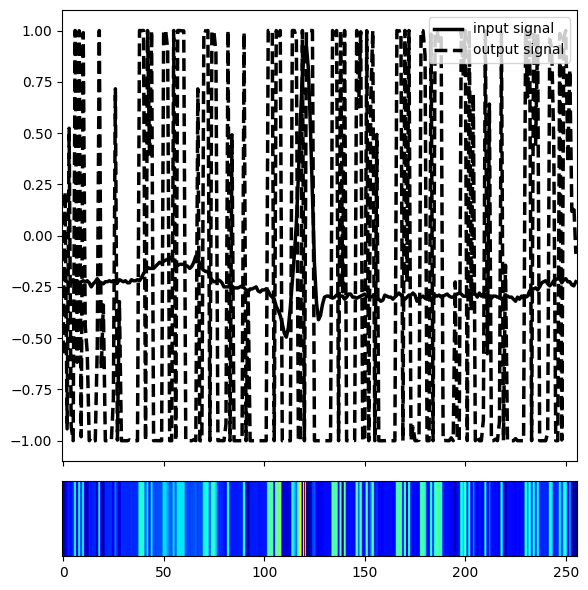

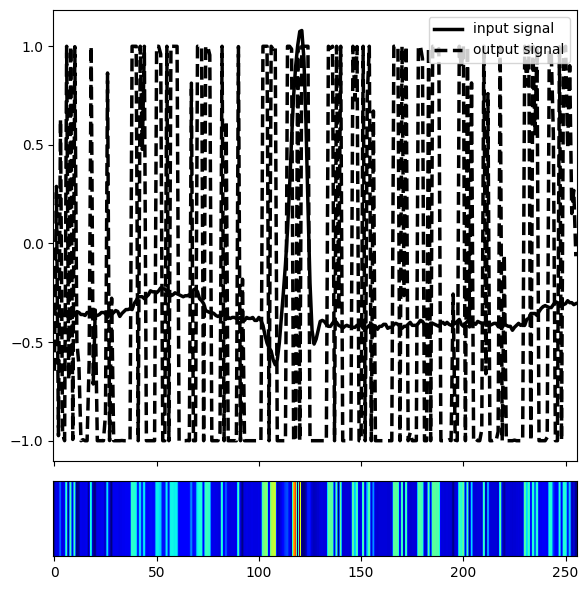

In [41]:
import numpy as np

new_score=[]
window_size=32

for scores in rec_err:
  tmp_score=0
  for i in range(0, len(scores), window_size):
    tmp_score=max(tmp_score, np.mean(scores[i:i+window_size]))
  new_score.append(tmp_score)
ind=np.argsort(new_score)

st.plot(st.BeatGAN, ori_ts[ind[0]],rec_ts[ind[0]],rec_err)
st.plot(st.BeatGAN, ori_ts[ind[-1]],rec_ts[ind[-1]],rec_err)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.ensemble import IsolationForest

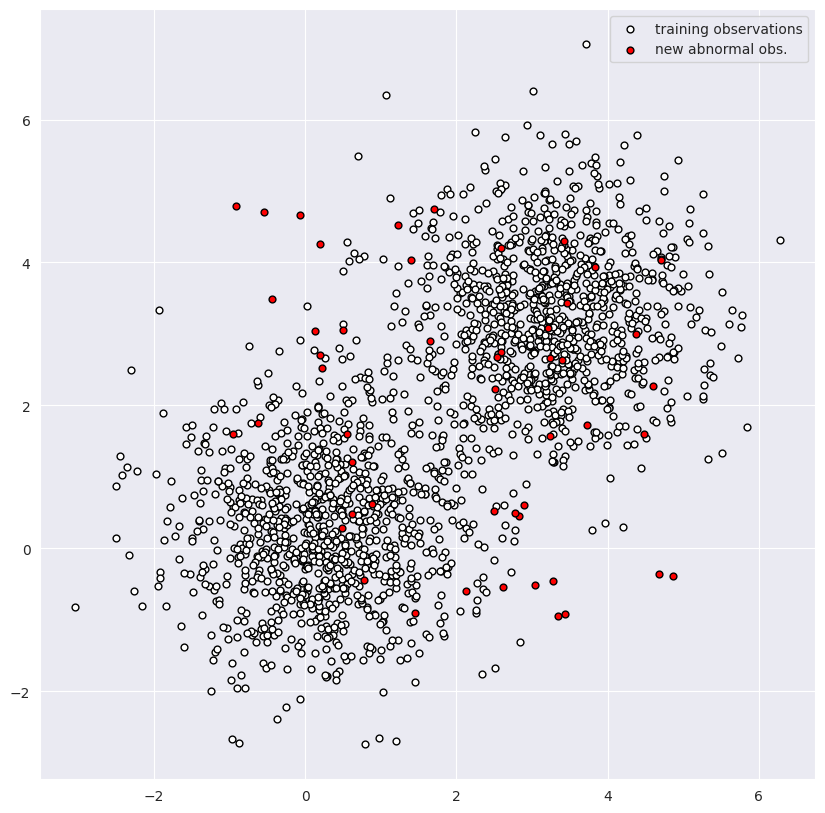

In [46]:
rng=np.random.RandomState(42)
#Training data 생성
X_train=0.2+rng.randn(1000,2)
X_train=np.r_[X_train+3,X_train]
X_train=pd.DataFrame(X_train, columns=['x1','x2'])
#테스트 데이터 생성(normal)
X_test=0.2+rng.randn(200,2)
X_test=np.r_[X_test+3,X_test]
x_test=pd.DataFrame(X_test,columns=['x1','x2'])
#이상치 데이터 생성
X_outliers=rng.uniform(low=-1,high=5,size=(50,2))
X_outliers=pd.DataFrame(X_outliers, columns=['x1','x2'])
#시각화하기
plt.rcParams['figure.figsize']=[10,10]
p1=plt.scatter(X_train.x1,X_train.x2,c='white',s=20+4,edgecolor='k', label='training observations') # 정상 데이터
p3=plt.scatter(X_outliers.x1,X_outliers.x2,c='red',s=20+4,edgecolor='k', label='new abnormal obs.') # 이상치
plt.legend()

In [51]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt 

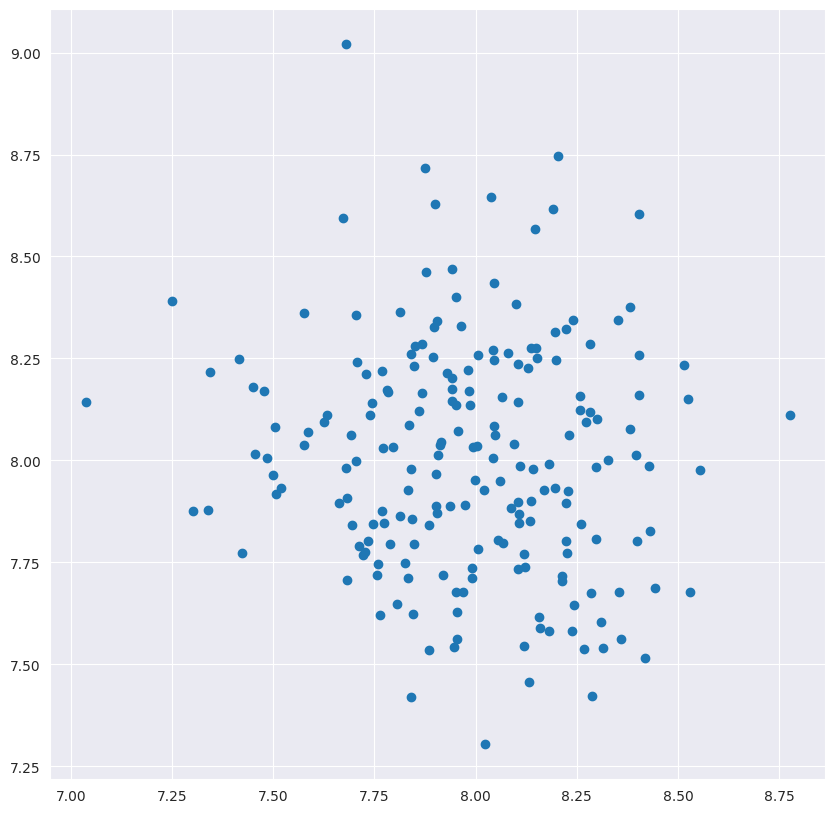

In [66]:
random.seed(13)
x, _ =make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8,8))

plt.scatter(x[:,0], x[:,1])
plt.show()

OneClassSVM(gamma=0.001, nu=0.03)


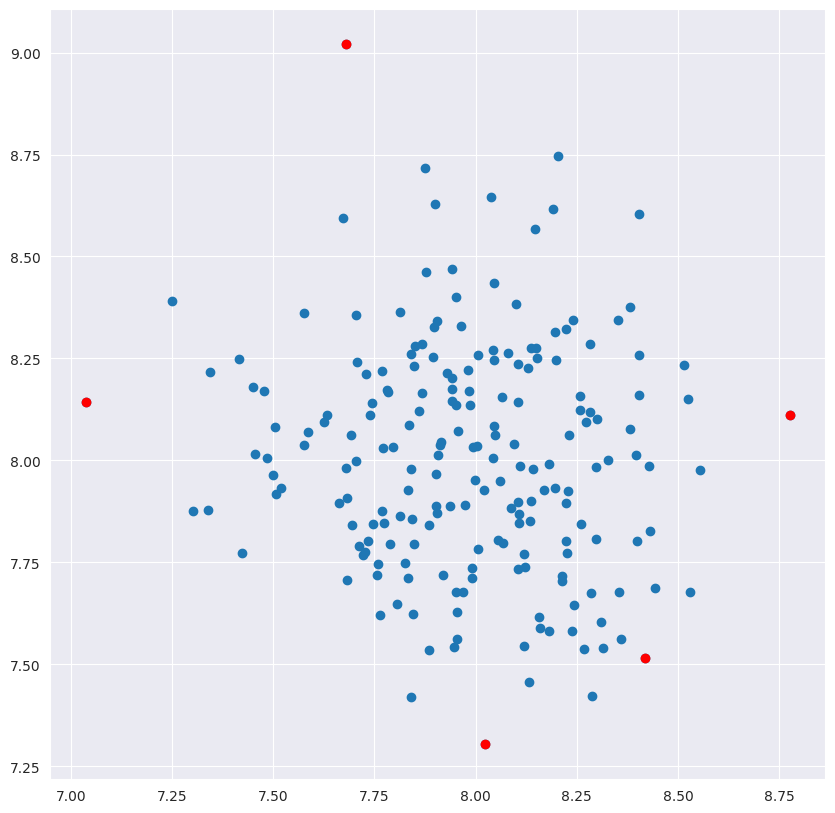

In [67]:
#OC SVM model 생성
svm=OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)
#OC SVM 모델 학습
svm.fit(x)
#예측(이상치 탐색)
pred=svm.predict(x)
anom_index=where(pred==-1)
values=x[anom_index]

#시각화
plt.scatter(x[:,0],x[:,1])
plt.scatter(values[:,0],values[:,1],color='r')
plt.show()